In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
exames_df = pd.read_csv("exames.csv")
exames_df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


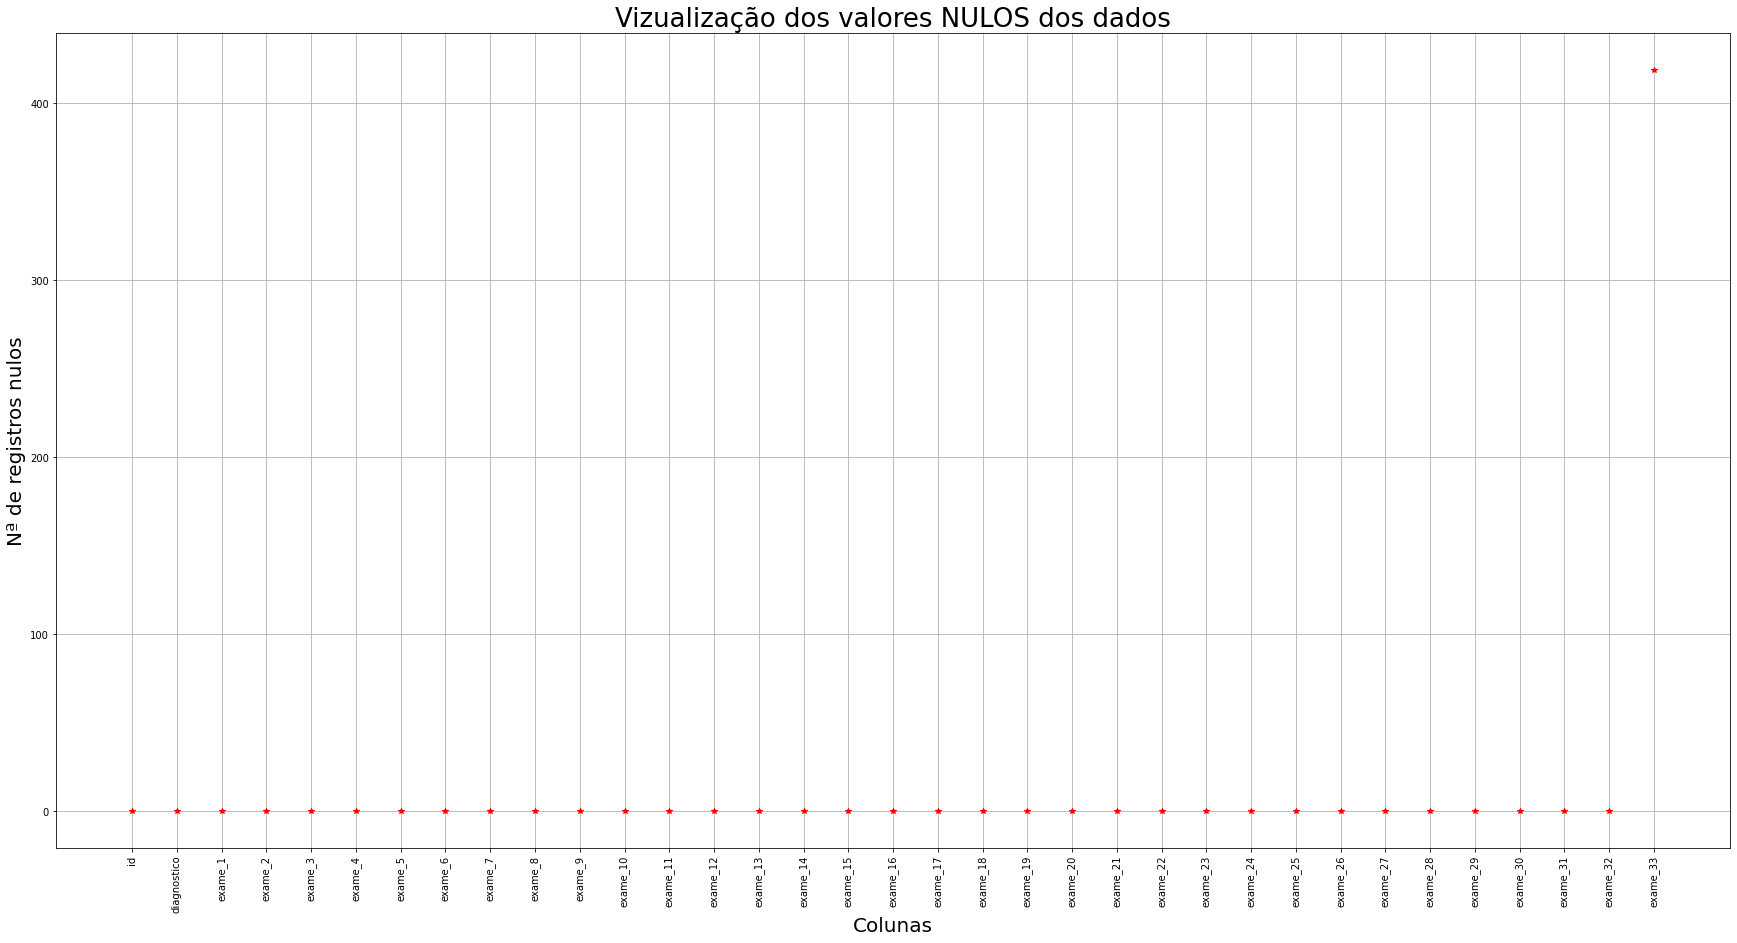

In [10]:
plt.figure(figsize=(30, 15))
plt.title("Vizualização dos valores NULOS dos dados", fontsize=26)
plt.ylabel("Nª de registros nulos", fontsize=20)
plt.xlabel("Colunas", fontsize=20)
plt.xticks(rotation = 90)
plt.plot(exames_df.isnull().sum(), "r*")
plt.grid(True)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

resultados_exames = exames_df.drop(columns=["exame_33"]) # removendo a coluna nula
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, 
                                                        diagnostico,
                                                        test_size=0.3)

In [28]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
score = classificador.score(teste_x,teste_y)
print(f"Desempenho do Random Forest Classifier: {score* 100:.4f} %")

Desempenho do Random Forest Classifier: 92.3977 %


In [29]:
from sklearn.dummy import DummyClassifier

dummy_classificador = DummyClassifier(strategy="most_frequent")
dummy_classificador.fit(treino_x, treino_y)
score = dummy_classificador.score(teste_x,teste_y)
print(f"Desempenho do Dummy Classifier: {score* 100:.4f} %")

Desempenho do Dummy Classifier: 66.6667 %
